
Online-Kurs zu Modellierung und Simulation, Goethe-Universität-Frankfurt | [Startseite](../index.ipynb)

---


# Numerische Lösung der Lotka-Volterra Gleichungen 



Populationen von Beute $x$ und Räubern $y$
\begin{align}
\dot{x} & = (a-b y)x \\
\dot{y} & = -(c -dx)y\\
\end{align}
mit $a,b,c,d>0$ zum Anfangswert $(x_0, y_0)^T$. 

## Lösen der DGL
Definition von Vektoren Anfangswert 
$$\vec u_0 = \begin{pmatrix} x_0\\ y_0\end{pmatrix} = \begin{pmatrix} 0.1 \\ 1\end{pmatrix}$$
sowie für den stationären Zustand 
$$\vec u^* = \begin{pmatrix} x^*\\ y^*\end{pmatrix} = \begin{pmatrix} c/d \\ a/b\end{pmatrix}.$$

Zudem definieren wir noch eine Koeffizientenmatrix $$\begin{pmatrix} a & b\\ c& d \end{pmatrix}.$$ Da diese in den übrigen Funktionen bekannt sein soll, verwenden wir das Schlüsselwort 'global.

In [1]:
u0=[0.1; 1]
global Coeff =[2 1; 3 4]; 
ustat = [Coeff(2,1) / Coeff(2,2); Coeff(1,1)/Coeff(1,2)]; 
% Bemerke: Falls ein Kommando mit Semikolon beendet wird, erfolgt keine Ausgabe. 
global Coeff =[2 1; 3 4]; 

u0 =

   0.10000
   1.00000



Nun könnnen wir die rechte Seite der Differentialgleichung definieren.

In [2]:
function udot=f_lotka_volterra(u, t)
    global Coeff
    udot = zeros(2,1);     
    udot(1) = u(1)*(Coeff(1,1) - Coeff(1,2)*u(2));
    udot(2) = - u(2)*(Coeff(2,1)- Coeff(2,2)*u(1));
endfunction

Definiere mittels `linspace` einen Vektor "times" mit 500 äquidistant verteilten Punkten im Intervall [0,20]. 

In [3]:
times = linspace(0.0, 20.0, 500);

Lösen der DGL mit `lsode`.

In [4]:
numsol  = lsode (@(y,t) f_lotka_volterra(y,t), u0, times);

## Erzeuge einige Plots

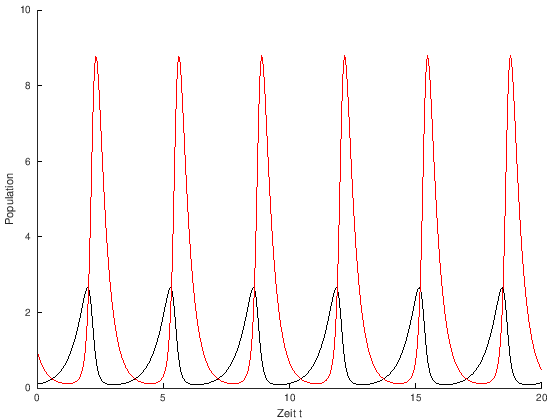

In [5]:
hold on   % 
xlabel('Zeit t')
ylabel('Population')
plot(times, numsol(:,1), 'color', 'black')
plot(times, numsol(:,2), 'color', 'red')

Nun eine Darstellung von Hasen gegen Füchse. 

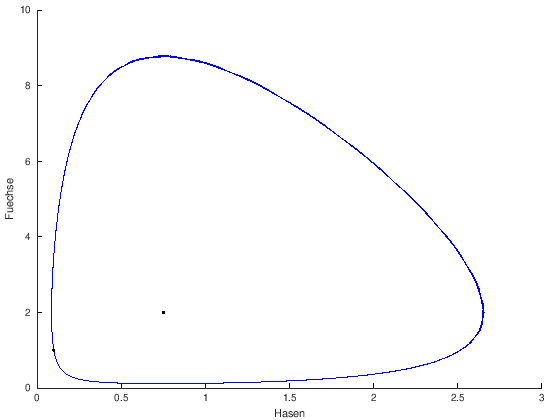

In [6]:
hold on
xlabel('Hasen')
ylabel('Fuechse')
plot(numsol(:,1), numsol(:,2), 'color', 'blue')
plot(ustat(1), ustat(2), 'color', 'black')
plot(u0(1), u0(2), 'color', 'black')

Zuletzt das gleiche mit Vektorfeld:

N =  17
xmax =  2.6562
ymax =  8.7922


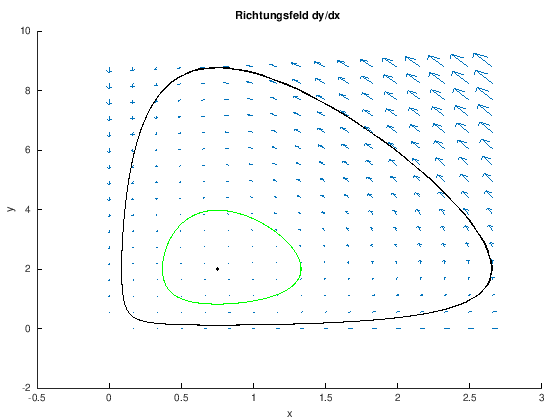

In [7]:

% Erstelle N x N Raster
N = 17 % 17 Punkte = 16 Intervalle

xmax = max(numsol(:,1))
ymax = max(numsol(:,2))

xaxis= linspace(0.0, xmax, N);
yaxis= linspace(0.0, ymax, N);

% Initialisierung
dxRaster = zeros(N);
dyRaster = zeros(N);

% Erstelle eine Matrix mit i,j Indizierung
for i=1:length(yaxis)
for j=1:length(xaxis)
    f = f_lotka_volterra([xaxis(j); yaxis(i)], 0);
    dxRaster(i,j) = f(1);
    dyRaster(i,j) = f(2);
end
end

% Eine weitere Lösung zum Anfangswert (0.5, 1)
numsol2 = lsode (@(y,t) f_lotka_volterra(y,4,t), [0.5; 1], times); 
 
% Eigentlicher Plot mit quiver (s. help quiver)
hold on
xlabel('x')
ylabel('y')
title ("Richtungsfeld dy/dx ");
quiver (xaxis, yaxis, dxRaster, dyRaster);
plot(numsol(:,1), numsol(:,2), 'color', 'black')
plot(numsol2(:,1), numsol2(:,2), 'color', 'green')
plot(ustat(1), ustat(2), 'color', 'black')

## Bemerkung
* Hilfe zu den Befehlen erhält man mit `help`, z.B. `help plot`. 
* Codezellen unterstützen <TAB>-Expansion.
* Zuletzt: Viel Freude beim Experimentieren!

In [ ]:
help plot